In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

We generate data in the form 

$$
y = f(x) + \varepsilon
$$

where: `y_noise` $= \varepsilon \sim \mathcal{N}(\mu = 0, \sigma)$, with a fixed value for $\sigma$.
Also, we take $f(x)$ to be $f(x; a, b) = ax + b$.

In [57]:
N = 20
sigma = 1
x = np.linspace(0, 100, num = N)

np.random.seed(2019)
y_noise = np.random.normal(scale=sigma, size=N)
error_deviation_array = sigma * np.ones(N)

def f(x, a, b):
    return(a*x + b)

a = 0.5
b = - 10

y = f(x, a, b) + y_noise

We fit the data to the model using a least-squares method, and estimate the parameters $a$ and $b$ with their standard deviations, `sigma_a` and `sigma_b` respectively.

We then calculate the value of the $\chi ^2$ variable corresponding to the data as:

$$
\chi ^2 _{obs} = \sum _{i=0} ^{N-1}
\left( \frac{y - y_{pred}}{\sigma_y} \right) ^2
$$

In [58]:
popt, pcov = curve_fit(f, x, y, absolute_sigma=True)

popt_errors = np.sqrt(np.diagonal(pcov))

a = popt[0]
b = popt[1]
sigma_a = popt_errors[0]
sigma_b = popt_errors[1]

y_predictions = f(x, *popt)
square_deviations = ((y - y_predictions)/error_deviation_array)**2

chi2_obs = np.sum(square_deviations)

We expect the $\chi^2_{obs}$ to follow a $\chi^2$ distribution with `df`$= N-2$ degrees of freedom.

We calculate its distribution and plot the obtained value, as well as the distribution mean (which is exactly `df`).

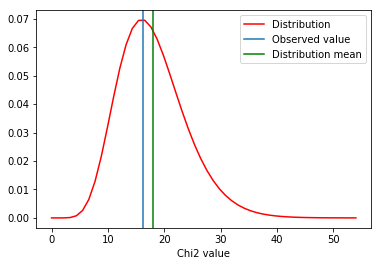

In [59]:
df = N-2
chi2_distribution = chi2(df=df)

chi2_values = np.linspace(0, 3*df)
plt.plot(chi2_values, chi2_distribution.pdf(chi2_values), label="Distribution", c='r')
plt.axvline(x=chi2_obs, label="Observed value")
plt.axvline(x=chi2_distribution.mean(), label="Distribution mean", c='g')
plt.xlabel("Chi2 value")
plt.legend()